<a href="https://colab.research.google.com/github/oliverzannino/oliverza/blob/main/Final_2025Assignment2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="font-family:Impact,Arial;font-size:30px;">37004 Interest Rates and Credit Risk Models - Spring 2025</h1>
<h1 style="font-family:Impact,Arial;font-size:45px;">Assignment Part 2</h1>
<h2 style="font-family:Arial;">Erik Schl&ouml;gl</h2>
<p><small> School of Mathematical &amp; Physical Sciences<br>
University of Technology Sydney
</small></p>
<p>
<a href="mailto:Erik.Schlogl@uts.edu.au?Subject=37000 JIT" target="_blank">
<small><font color=MediumVioletRed>Erik.Schlogl@uts.edu.au</font></small></a>
</p>
<hr style="height:5px;border:none;color:#333;background-color:#333;" />

# Monte Carlo simulation
The goal is to calculate the expected value of a function $f(\cdot)$ of a random variable $x$, where the distribution of $x$ is given by the probability density $\psi(x)$, i.e.
$$
E[f(x)]=\int_{-\infty}^{\infty}f(x)\psi(x)dx
$$

## Outline of the Monte Carlo simulation
1. Establish a procedure for drawing variates $x$ from the target distribution $\psi(x)$.
2. Initialise the variables:
   RunningSum = 0
   RunningSumSquared = 0
   $i=1$
3. Draw a realisation $x_i$ from the target distribution.
4. Add $f(x_i)$ to RunningSum and  $(f(x_i))^2$ to RunningSumSquared.
5. Increment the counter $i$. If $i$ is less than the maximum number of iterations, go to step 3.
6. Calculate the simulated mean by dividing RunningSum by the total number of iterations.
7. Calculate the variance of the simulations by dividing RunningSumSquared by the total number of iterations and subtracting the square of the mean.

## Error estimation for Monte Carlo methods
By the Central Limit Theorem, we know that for a large number $N$ of simulations, the simulation mean $X_N$ is approximately normally distributed, with standard deviation
$$
\sqrt{\frac{\sigma^2}N}
$$
where the simulation variance is an estimate for $\sigma^2$.

Thus, if there is no bias, the simulation mean is normally distributed around the target value with a standard deviation, which decreases with $\sqrt{N}$.

A 95% confidence interval for the target value is therefore approximately given by
$$
\left[X_N-2\sqrt{\frac{\sigma^2}N};X_N+2\sqrt{\frac{\sigma^2}N}\right]
$$

<font color='red'>**Monte Carlo simulation without error bounds is meaningless!**</font>

The NumPy function `random.standard_normal()` returns a random variate drawn from the standard normal distribution, while `random.standard_normal(n)` returns `n` such variates in a Numpy array:

In [ ]:
import numpy as np
print(np.random.standard_normal())
n = 5
print(np.random.standard_normal(n))

1.8900847600733264
[ 0.5984016  -0.70912333 -1.11383386 -1.13607074 -1.00113037]


Recall that a standard normal random variable can be converted into a normal random variable of desired mean and standard deviation by multiplying by the standard deviation and adding the mean.

## Monte Carlo pricing of a Black/Scholes call option
In the Black/Scholes model, the price of the underlying stock follows Geometric Brownian motion, with the dynamics under the risk-neutral measure given by
$$S(T)=S(t)\exp\left\{\left(r−\frac12\sigma^2\right)(T−t)+\sigma(W(T)−W(t))\right\}$$
Recall that the time 0 price of a European call option (and analogously the put option) expiring at time $T$ with strike price $K$ can be expressed as the expectation under the risk-neutral measure of
$$C=E\left[e^{−rT}\max(0,S(T)−K)\right]$$
Thus we can write a Python function which calculates the Monte Carlo estimate `MC` for the Black/Scholes price of the option and the standard deviation `MCstd` of the simulation mean, where the function takes seven arguments (in this order): $S$, $K$, $\sigma$, $r$, $T$, a 1 for a call or -1 for a put, and $n$, the number of sampling iterations of the Monte Carlo algorithm:

In [ ]:
def BlackScholesMC(S,K,sgm,r,T,callput,n):
    w = np.random.standard_normal(n)
    ST=S*np.exp((r-0.5*sgm**2)*T+sgm*np.sqrt(T)*w)
    payoff=callput*(ST-K)
    payoff=payoff*(payoff>0)
    MC=np.exp(-r*T)*np.mean(payoff)
    MCstd=np.exp(-r*T)*np.std(payoff)/np.sqrt(n)
    return MC, MCstd

To run this code with user inputs:

In [ ]:
stock = float(input('Enter the underlying stock price: '))
strike = float(input('Enter the strike price: '))
sigma = float(input('Enter the volatility: '))
interest = float(input('Enter continuously compounded interest rate: '))
maturity = float(input('Enter the time to maturity: '))
callput = int(input('Enter 1 for call or -1 for put option: '))
n = int(input('Enter the number of simulations: '))
MC, MCstd = BlackScholesMC(stock,strike,sigma,interest,maturity,callput,n)
print('The MC estimate for the option price is: ')
print(MC)
print('The 2 standard deviation confidence interval for the option price is: ')
print(MC-2*MCstd,MC+2*MCstd)

Enter the underlying stock price: 100
Enter the strike price: 105
Enter the volatility: 0.3
Enter continuously compounded interest rate: 0.03
Enter the time to maturity: 2.1
Enter 1 for call or -1 for put option: 1
Enter the number of simulations: 1000
The MC estimate for the option price is: 
17.80604821195728
The 2 standard deviation confidence interval for the option price is: 
15.642865098188343 19.969231325726213


# Spread option
Consider a European call option with maturity $T$ and strike $K$ on the spread between the three-month interest rate (with simple compounding) and the three-month forward interest rate (with simple compounding) for an accrual period commencing in ten years, on a notional $N$. Thus, using the notation defined on Slides 6 and 12 of Lecture 1b, the payoff at time $T$ is
$$
N\cdot\max[0,r_n(T,T+0.25)-f_n(T,T+10,T+10.25)-K]
$$
Assume that interest rate dynamics are given by a $d$-dimensional Gauss/Markov HJM model with volatility parameters $\nu$ and mean reversion parameters $a$ as defined on Slide 28 of Lectures 2 and 3. Assume that the term structure at time zero is given by the term structure that you determined in Task 1 of Assignment Part 1.

## Task 1
Using the scaffold provided, write a Python function which calculates the time zero price of the option in the case of $d=1$, where the function takes five arguments (in this order): the notional $N$, the option expiry $T$, the strike $K$, the volatility parameter $\nu$ as `nu`, and the mean reversion parameter $a$. <em>(6 marks)</em>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import brentq
from scipy.stats import norm
from scipy.optimize import root_scalar
from scipy.integrate import dblquad
from scipy.interpolate import interp1d

df = pd.read_csv('/content/term_structure (1).csv')
df # task one from previous assignment

,Type,Term,Rate,Term_in_years,Discount Factor
0,BBSW,1 month,3.6909,0.083333,0.996934
1,BBSW,2 months,3.6963,0.166667,0.993877
2,BBSW,3 months,3.7018,0.250000,0.990830
3,BBSW,4 months,3.7225,0.333333,0.987744
4,BBSW,5 months,3.7375,0.416667,0.984666
5,BBSW,6 months,3.7772,0.500000,0.981464
6,Swap,1 year,3.6100,1.000000,0.964712
7,Swap,2 years,3.5200,2.000000,0.932349
8,Swap,3 years,3.5500,3.000000,0.899408
9,Swap,4 years,3.6200,4.000000,0.866224


In [32]:
# set up function for log linear interp

def make_B0_from_df(df):
    terms = df['Term_in_years'].values
    dfs = df['Discount Factor'].values
    log_df_interp = interp1d(terms, np.log(dfs), kind='linear', fill_value='extrapolate')

    def B0(t):
        return np.exp(log_df_interp(t))

    return B0

B0 = make_B0_from_df(df)

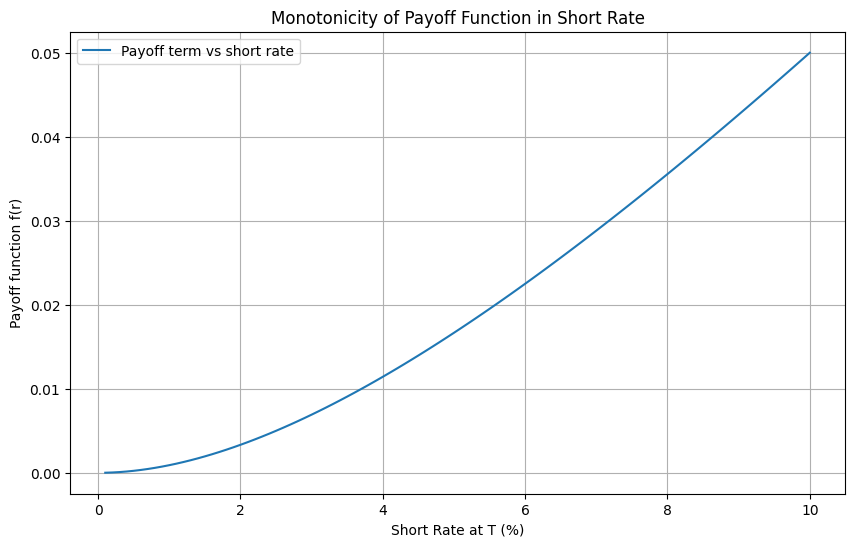

In [33]:
## firstly, take a look at where this option has a positive payoff

# Define the payoff function as a function of r
def f_of_r(r, tau_short=0.25, tau_long_start=10, tau_long=0.25):
    # Short-term bond price
    B_short = 1 / (1 + tau_short * r)

    # Long-term bond prices
    B_long_start = 1 / (1 + tau_long_start * r)
    B_long_end = 1 / (1 + (tau_long_start + tau_long) * r)

    # Forward discount factor (simple forward rate approximation)
    forward_ratio = B_long_start / B_long_end

    # Payoff function
    payoff_term = (1 / tau_short) * (1 / B_short - forward_ratio)

    return payoff_term

# Create a range of short rates (from 0% to 10%)
r_values = np.linspace(0.001, 0.10, 100)
f_values = f_of_r(r_values)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(r_values * 100, f_values, label="Payoff term vs short rate")
plt.xlabel("Short Rate at T (%)")
plt.ylabel("Payoff function f(r)")
plt.title("Monotonicity of Payoff Function in Short Rate")
plt.grid(True)
plt.legend()
plt.show()

## note that when r* = k*, the function (r-f) is greater than K when r > r* . so this indicator (r - f > k) is the same when r > r* (has a positive payoff when r > r* . negative payoff when r < r* )
# this is useful for the analytical solution, as it can be expressed as functions of discount factors

payoff:

$\max \left\{r_{n}\left(T_{1}, T+0.25\right)-f_{n}(T, T+0.25, T+10.25)-K, 0\right\}$

Changing from beta to T forward measure using:

$\frac{d\mathbb{P}_{T}}{d\mathbb{P}_{\beta}} \Bigg|_{\mathcal{F}_T}
= \frac{B(T, T)}{B(0, T)} \frac{\beta(0)}{\beta(T)}$  

and noticing that the 1's cancel, we are left with

$V(0)=4 N B(0, T) \mathbb{E}_{T}\left[\left(\frac{1}{B(T, T+0.25)}-\frac{B(T, T+10)}{B(T, T+10.25)}-\frac{K}{4}\right) \mathbb{I}_{\theta}\right]$

$\theta=\left\{\frac{1}{B(T,T+0.25)}-\frac{B(T, T+10)}{B(T, T+10.25)}>\frac{K}{4}\right\}$

Under multifactor affine function:

$B(T, T + \Delta)=A(T, T + \Delta) e^{-\beta(T, T + \Delta) z(T)}$ where $z(T)\sim ^{P_{\beta}} N\left(0, v^{2} \int_{0}^{T} e^{2 a u} d u\right)$

$A(T, T+\Delta)=\frac{B(0, T + \Delta)}{B(0, T)} \exp \left\{-\int_{T}^{T+\Delta} \int_{0}^{T} \frac{v^{2}}{a} e^{-a(u-s)}\left(1-e^{-a(u-s)}\right) d s d u\right\}$

$\beta(T, T+\Delta)=\int_{T}^{T+\Delta} e^{-a u} d u$

Thus,

$$
\theta = \left\{
\frac{e^{\beta(T, T + 0.25) z(T)}}{A(T, T + 0.25)}
- \frac{A(T, T + 10)}{A(T, T + 10.25)} e^{(\beta(T, T + 10.25) - \beta(T, T + 10)) z(T)}
\right\} > \frac{K}{4}
$$

It can be seen from the above and this is an increasing function. Hence, this spread has positive payoff when:

$\theta=\left\{z(T)>z^{*}\right\}$ where $z^{*}$ s.t. $h\left(z^{*}\right)=\frac{K}{4}$


Evaluating first term $ \ E_{T}\left[ \frac{1}{B(T, T+0.25)} I_{\{\theta\}} \right] $

Note that $\frac{B(T,T)}{B(T,T+0.25)}$ is a martingale under $P_{T+0.25}$.

$\frac{B(T,T)}{B(T,T+0.25)} = \frac{B(0,T)}{B(0,T+0.25)} \times \exp \left\{ \int_0^T \big( -\sigma^{*}(u,T) + \sigma^{*}(u,T+0.25) \big) dW_{T+0.25}(u) - \frac{1}{2} \int_0^T \big( -\sigma^{*}(u,T) + \sigma^{*}(u,T+0.25) \big)^2 du \right\}$

Using Girsanov's:

$d W_{T}(u)=d W_{T+0.25}(u)-\left(-\sigma^{*}(u, T)+\sigma^{*}(u, T +0.25)\right) d u$

So:

$\frac{B(T,T)}{B(T,T+0.25)} = \frac{B(0,T)}{B(0,T+0.25)} \times \exp \left\{ \int_0^T \big( -\sigma^{*}(u,T) + \sigma^{*}(u,T+0.25) \big) dW^{T}(u) + \frac{1}{2} \int_0^T \big( -\sigma^{*}(u,T) + \sigma^{*}(u,T+0.25) \big)^2 du \right\}$

$
\frac{dP_{T+0.25}}{dP_T} \Bigg|_{\mathcal{F}_T} = \frac{B(T,T)}{B(T,T+0.25)} \times \text{deterministic factor } (d_1)
$

which is a martingale under P_T

Thus,

$d_1 = \exp(-\int_0^T \left( -\sigma^{*}(u,T) + \sigma^{*}(u,T+0.25) \right)^2 \, du)$

$d_1 = \exp\left( - \int_0^T \left[ -\dfrac{\nu}{a} (1 - \exp(-a (T-u))) + \dfrac{\nu}{a} (1 - \exp(-a (T+0.25-u))) \right]^2 \, du \right)$,

$\mathbb{E}_T \left[ \frac{1}{B(T, T+0.25)} \mathbf{I}_{\{\theta\}} \right]
= \frac{B(0,T)}{B(0,T+0.25)} \frac{1}{d_1} P_{T+0.25}(\theta)
= \frac{B(0,T)}{B(0,T+0.25)} \frac{1}{d_1} P_{T+0.25} \left({z(T)}> {z^*} \right)$

Second term:

Evaluating $ \ E_{T}\left[ \frac{B(T,T+10)}{B(T, T+10.25)} I_{\{\theta\}} \right] $

$
\frac{dP_{T+10}}{dP_T} \Bigg|_{\mathcal{F}_T} = \frac{B(T,T+10)}{B(T,T)} \times \frac{B(0,T)}{B(0,T+10)}
$

$\mathbb{E}_T \left[ \frac{B(T,T+10)}{B(T, T+10.25)} \mathbf{I}_{\{\theta\}} \right] = \frac{B(0,T+10)}{B(0,T)} \mathbb{E}_{T+10} \left[ \frac{1}{B(T, T+10.25)} \mathbf{I}_{\{\theta\}} \right]$


$\frac{B(T,T)}{B(T,T+10.25)} = \frac{B(0,T)}{B(0,T+10.25)} \times \exp \left\{ \int_0^T \big( -\sigma^{*}(u,T) + \sigma^{*}(u,T+10.25) \big) dW_{T+10.25}(u) - \frac{1}{2} \int_0^T \big( -\sigma^{*}(u,T) + \sigma^{*}(u,T+10.25) \big)^2 du \right\}$

which is a martingale under T+10.25 measure

Using Girsanov's:

$d W_{T+10}(u)=d W_{T+10.25}(u)-\left(-\sigma^{*}(u, T+10)+\sigma^{*}(u, T +10.25)\right) d u$

$\frac{B(T,T)}{B(T,T+10.25)} = \frac{B(0,T)}{B(0,T+10.25)} \times \exp \left\{ \int_0^T \big( -\sigma^{*}(u,T) + \sigma^{*}(u,T+10.25) \big) dW_{T+10}(u) - \frac{1}{2} \int_0^T \big( -\sigma^{*}(u,T) + \sigma^{*}(u,T+10.25) \big)^2 du + \int_0^T \big( -\sigma^{*}(u,T) + \sigma^{*}(u,T+10.25) \big) ( -\sigma^{*}(u,T+10) + \sigma^{*}(u,T+10.25)) du \right\}$

$\frac{dP_{T+10.25}}{dP_{T+10}} \Bigg|_{\mathcal{F}_T} = \frac{B(T,T)}{B(T,T+10.25)} \times \frac{B(0,T+10.25)}{B(0,T)} \times \text{deterministic factor } (d_2)$

$d_2 = \exp\left( - \int_0^T \big( -\sigma^{*}(u,T) + \sigma^{*}(u,T+10.25) \big) \big( -\sigma^{*}(u,T+10) + \sigma^{*}(u,T+10.25) \big) \, du \right)$

Thus,
$
\frac{B(0,T+10)}{B(0,T)} \mathbb{E}_{T+10} \left[ \frac{1}{B(T, T+10.25)} \mathbf{I}_{\{\theta\}} \right]$ = $\frac{B(0,T+10)}{B(0,T+10.25)} \frac{1}{d_2} P_{T+10.25} \left({z(T)}> {z^*} \right)$



Third term:

$\mathbb{E}_T\left[ \frac{K}{4} \cdot \mathbf{I}_{\{ z(T) > z^* \}} \right] = \frac{K}{4} \cdot P_T\left( z(T) > z^* \right) = \frac{K}{4} \cdot \Phi\left( \frac{ -\frac{v^2}{a} \int_0^T e^{a u} (1 - e^{-a(T - u)}) du - z^* }{ \sqrt{v^2 \int_0^T e^{2 a u} du} } \right)$


Putting it all together

$V(0) = 4N B(0,T) \left[ \frac{B(0,T)}{B(0,T+0.25)} \frac{1}{d_1} P_{T+0.25}(z(T) > z^*) - \frac{B(0,10)}{B(0,10.25)} \frac{1}{d_2} P_{T+10.25}(z(T) > z^*) - \frac{K}{4}  P_T(z(T) > z^*) \right]$

Recall:

$z(T)\sim ^{P_{\beta}} N\left(0, v^{2} \int_{0}^{T} e^{2 a u} d u\right)$

$z(T) = v \int_0^T e^{a u}  dW_\beta(u)$

We know that
$\frac{B(t, T)}{\beta(t)} = \frac{B(0, T)}{B(0)} \cdot \exp\left( - \int_0^t \sigma^{*}(u, T) \, dW^{\beta}(u) - \frac{1}{2} \int_0^t \left( \sigma^{*}(u, T) \right)^2 \, du \right)$

$dW_T(u) = dW_{\beta}(u) + \sigma^{*}(u, T) \, du$

$z(T) = v \int_0^T e^{a u} \left( dW_T(u) - \sigma^{*}(u, T) \, du \right)$

we know that $\sigma^{*}(u,T) = \frac{v}{a} \left(1 - e^{-a (T - u)} \right)$

$z(T) = -\frac{v^2}{a} \int_0^T e^{a u} \left(1 - e^{-a (T - u)}\right) \, du + v \int_0^T e^{a u} \, dW_T(u)$

$$ z(T) \overset{P_T}{\sim} \mathcal{N} \left(
\frac{v^2}{a} \int_0^T e^{a u} \left(1 - e^{-a (T - u)} \right) du, \quad v^2 \int_0^T e^{2 a u} du \right)$$

Similarly,

$d W_{T}(u)=d W_{T+0.25}(u)-\left(-\sigma^{*}(u, T)+\sigma^{*}(u, T +0.25)\right) d u$

$z(T) \overset{\mathbb{P}_{T+0.25}}{\sim} \mathcal{N} \left(
-\dfrac{\nu^2}{a} \int_0^T e^{a u} \left(2 \left(1 - e^{-a (T - u)}\right) - \left(1 - e^{-a (T + 0.25 - u)}\right)\right) \, du,
\quad
\nu^2 \int_0^T e^{2 a u} \, du
\right)$

and,

$dW_{T+10}(u) = dW_T(u) - \big( \sigma^{*}(u, T) - \sigma^{*}(u, T+10) \big) \, du$

$d W_{T+10.25}(u)=d W_{T+10}(u)+\left(-\sigma^{*}(u, T+10)+\sigma^{*}(u, T +10.25)\right) d u$

$z(T) \overset{\mathbb{P}_{T+10.25}}{\sim} \mathcal{N} \left( -\dfrac{\nu^2}{a} \int_0^T e^{a u} \left[ \left(1 - e^{-a (T - u)}\right) + \left(1 - e^{-a (T + 10 - u)}\right) - \left(1 - e^{-a (T + 10.25 - u)}\right) \right] \, du
, \quad
v^2 \int_0^T e^{2 a u} du
\right)$



In [34]:
def Task1Option(N,T,K,nu,a):
    B0 = make_B0_from_df(df)

    def affine_A(B0, nu, a, delta,T):
        x = B0(T+delta)/B0(T)

        def integral_A(T, delta, v, a):
            f = lambda s, u: (v**2 / a) * np.exp(-a*(u - s)) * (1 - np.exp(-a*(u - s)))
            val, err = dblquad(f, T, T+delta, lambda u: 0.0, lambda u: T)
            return -val

        z = x * np.exp(integral_A(T, delta, nu, a))
        return z

    def affine_B(a, delta,T):
        return (np.exp(-a*T)-np.exp(-a*(T+delta)))/a

    def solve_z_star(T, K):
        A1 = affine_A(B0, nu, a, 0.25,T)
        A2 = affine_A(B0, nu, a, 10,T)
        A3 = affine_A(B0, nu, a, 10.25,T)

        B1 = affine_B(a, 0.25,T)
        B2 = affine_B(a, 10,T)
        B3 = affine_B(a, 10.25,T)

        def f(z):
            return (np.exp(B1*z)/A1)-(A2/A3)*np.exp((B3-B2)*z)-(K*0.25)

        sol = root_scalar(f, bracket=[-1,1], method = 'brentq')

        return sol.root

    def drift_integral1(a, T, nu):
        integrand = lambda u: np.exp(a*u) * (1.0 - np.exp(-a*(T - u)))
        I, _ = quad(integrand, 0.0, T, limit=200)
        return  (-(nu**2)/a)*I

    def drift_integral2(a, T, nu):
        integrand = lambda u: np.exp(a*u) * (2*(1.0 - np.exp(-a*(T - u)))-(1.0 - np.exp(-a*(T + 0.25 - u))))
        I, _ = quad(integrand, 0.0, T, limit=200)
        return  (-(nu**2)/a)*I

    def drift_integral3(a, T, nu):
        integrand = lambda u: np.exp(a*u) * ((1.0 - np.exp(-a*(T - u)))+(1.0 - np.exp(-a*(T + 10 - u)))-(1.0 - np.exp(-a*(T + 10.25 - u))))
        I, _ = quad(integrand, 0.0, T, limit=200)
        return  (-(nu**2)/a)*I

    def var_integral(a, T, nu):
        integrand = lambda u: np.exp(2*a*u)
        I, _ = quad(integrand, 0.0, T, limit=200)
        return  (nu**2)*I

    def deterministic_factor1(a, T, nu):
        integrand = lambda u: ((-nu/a)*(1-np.exp(-a*(T-u)))+(nu/a)*(1-np.exp(-a*(T+0.25-u))))**2
        I, _ = quad(integrand, 0.0, T, limit=200)
        return  np.exp(-I)

    def deterministic_factor2(a, T, nu):
        integrand = lambda u: ((-nu/a)*(1-np.exp(-a*(T-u)))+(nu/a)*(1-np.exp(-a*(T+10.25-u))))*((-nu/a)*(1-np.exp(-a*(T+10-u)))+(nu/a)*(1-np.exp(-a*(T+10.25-u))))
        I, _ = quad(integrand, 0.0, T, limit=200)
        return  np.exp(-I)

    cutoff = solve_z_star(T, K)

    P_T = norm.cdf((drift_integral1(a,T,nu)-cutoff)/(var_integral(a, T, nu)**0.5))
    P_T_1 = norm.cdf((drift_integral2(a,T,nu)-cutoff)/(var_integral(a, T, nu)**0.5))
    P_T_2 = norm.cdf((drift_integral3(a,T,nu)-cutoff)/(var_integral(a, T, nu)**0.5))

    d1 = deterministic_factor1(a, T, nu)
    d2 = deterministic_factor2(a, T, nu)

    term_1 = (B0(T)/B0(T+0.25))*(1/d1)*P_T_1
    term_2 = (B0(T+10)/B0(T+10.25))*(1/d2)*P_T_2
    term_3 = (K/4)*P_T

    value = 4*N*B0(T)*(term_1-term_2-term_3)

    return value

In [35]:
analytical_value = Task1Option(N=100000, T=8, K=0.004, nu=0.02, a=0.1)
print(f"Cost of spread option (d=1): ${analytical_value:.6f}")

Cost of spread option (d=1): $481.504776


Breaking up the above code


\begin{align*}
&\text{Value} = 4 N B(0,T) \left( term_1 - term_2 - term_3 \right), \\
&term_1 = \dfrac{B(0,T)}{B(0,T+0.25)} \dfrac{1}{d_1} P_{T+0.25}, \\
&term_2 = \dfrac{B(0,T+10)}{B(0,T+10.25)} \dfrac{1}{d_2} P_{T+10.25}, \\
&term_3 = \dfrac{K}{4} P_T,
\end{align*}

where $P_T = \Phi\left( \dfrac{\mu_1 - z^*}{\sqrt{v}} \right)$, $P_{T+0.25} = \Phi\left( \dfrac{\mu_2 - z^*}{\sqrt{v}} \right)$, $P_{T+10.25} = \Phi\left( \dfrac{\mu_3 - z^*}{\sqrt{v}} \right)$,

$z^*$ is the solution to $\dfrac{\exp(B_1 z)}{A_1} - \dfrac{A_2}{A_3} \exp\left( (B_3 - B_2) z \right) = K \times 0.25$,

$\mu_1 = -\dfrac{\nu^2}{a} \int_0^T \exp(a u) \left(1 - \exp(-a (T - u))\right) \, du$,

$\mu_2 = -\dfrac{\nu^2}{a} \int_0^T \exp(a u) \left(2 (1 - \exp(-a (T - u))) - (1 - \exp(-a (T + 0.25 - u)))\right) \, du$,

$\mu_3 = -\dfrac{\nu^2}{a} \int_0^T \exp(a u) [\left( (1 - \exp(-a (T - u))) + (1 - \exp(-a (T + 10 - u))) - (1 - \exp(-a (T + 10.25 - u))) \right)] \, du$,

$v = \nu^2 \int_0^T \exp(2 a u) \, du$,

$d_1 = \exp\left( - \int_0^T \left[ -\dfrac{\nu}{a} (1 - \exp(-a (T-u))) + \dfrac{\nu}{a} (1 - \exp(-a (T+0.25-u))) \right]^2 \, du \right)$,

$d_2 = \exp\left( - \int_0^T \left[ -\dfrac{\nu}{a} (1 - \exp(-a (T-u))) + \dfrac{\nu}{a} (1 - \exp(-a (T+10.25-u))) \right] \left[ -\dfrac{\nu}{a} (1 - \exp(-a (T+10-u))) + \dfrac{\nu}{a} (1 - \exp(-a (T+10.25-u))) \right] \, du \right)$,

and for $i=1,2,3$ with corresponding $\delta_i \in \{0.25, 10, 10.25\}$,

$A_i = \frac{B (0,T + \delta_i)}{B(0,T)} \exp\left( - \int_{s=0}^T \int_{u=T}^{T+\delta_i} \frac{\nu^2}{a} \exp(-a (u - s)) \left( 1 - \exp(-a (u - s)) \right) \, du \, ds \right)$,

$B_i = \dfrac{\exp(-a T) - \exp(-a (T + \delta_i))}{a}$.

## Task 2
Calculate the price of this option with $N=100,000$, $T=8$, $K=0.004$, $\nu=0.02$, $a=0.1$ by Monte Carlo simulation and use this to verify that your implementation of Task 1 is correct. *(6 marks)*

In [7]:
# task 2

def Monte_Carlo(N, T, K, nu, a, nsim):
  B0 = make_B0_from_df(df)

  def affine_A(B0, nu, a, delta,T):
    x = B0(T+delta)/B0(T)

    def integral_A(T, delta, v, a):
            f = lambda s, u: (v**2 / a) * np.exp(-a*(u - s)) * (1 - np.exp(-a*(u - s)))
            val, error = dblquad(f, T, T+delta, lambda u: 0.0, lambda u: T)
            return -val

    z = x * np.exp(integral_A(T, delta, nu, a))
    return z

  def affine_B(a, delta,T):
    return (np.exp(-a*T)-np.exp(-a*(T+delta)))/a

  def drift_integral1(a, T, nu):
    integrand = lambda u: np.exp(a*u) * (1.0 - np.exp(-a*(T - u)))
    I, _ = quad(integrand, 0.0, T, limit=200)
    return  (-(nu**2)/a)*I

  def var_integral(a, T, nu):
    integrand = lambda u: np.exp(2*a*u)
    I, _ = quad(integrand, 0.0, T, limit=200)
    return  (nu**2)*I

  A1 = affine_A(B0, nu, a, 0.25,T)
  A2 = affine_A(B0, nu, a, 10,T)
  A3 = affine_A(B0, nu, a, 10.25, T)

  B1 = affine_B(a, 0.25,T)
  B2 = affine_B(a, 10,T)
  B3 = affine_B(a, 10.25,T)

  rng = np.random.default_rng(seed=123) # for reproducibility

  z = rng.normal(loc=drift_integral1(a,T,nu), scale=var_integral(a,T,nu)**0.5, size=nsim)

  payoff = 4*N*((np.exp(B1*z)/A1) - (A2/A3)*np.exp((B3-B2)*z) -(K/4))
  payoff = np.maximum(payoff, 0)
  discounted = B0(T)*payoff

  price = discounted.mean()
  stderr = np.std(discounted) / np.sqrt(nsim)

  print(f"Price from MC: {price}")
  print(f"Standard error : {stderr}")
  print('The 2 standard deviation confidence interval for the option price is: ')
  print(price-2*stderr,price+2*stderr)
  return price, stderr

In [36]:
print(f"Price (Analytical Solution): {analytical_value}")
price, stderr = Monte_Carlo(100000,8, 0.004, 0.02, 0.1, 100000000)

Price (Analytical Solution): 481.5047763361174
Price from MC: 481.49998519889346
Standard error : 0.0880242192317045
The 2 standard deviation confidence interval for the option price is: 
481.32393676043006 481.67603363735685


In [30]:
# with user inputs

N = float(input('Enter N: '))
T = float(input('Enter T: '))
K = float(input('Enter K (strike): '))
nu = float(input('Enter nu: '))
a = float(input('Enter a: '))
nsim = int(input('Enter number of simulations: '))
price, stderr = Monte_Carlo(N, T, K, nu, a,nsim)

Enter N: 100000
Enter T: 8
Enter K (strike): 0.004
Enter nu: 0.02
Enter a: 0.1
Enter number of simulations: 100000000
Price from MC: 481.49998519889346
Standard error : 0.0880242192317045
The 2 standard deviation confidence interval for the option price is: 
481.32393676043006 481.67603363735685


As the number of observations increase, the Monte Carlo solution approaches the analytical solution that was generated by the function from Task 1. This verifies the Implementation of the Task 1 function.

In [10]:
# additional verification check
difference = abs(analytical_value - price)
within_2_std = difference < 2 * stderr
print(f"Difference: {difference:.6f}")
print(f"Within 2 Std Errors? {within_2_std}")

Difference: 0.004791
Within 2 Std Errors? True


Also, since the difference between the Monte Carlo estimate and the analytical price is less than 2 standard errors, we can conclude that the Monte Carlo result is statistically consistent with/verifies the analytical solution from Task 1. We can therefore say that with 95% confidence, the interval given by the Monte Carlo estimate ±2 standard errors contains the true value.

## Task 3
Using the scaffold provided, write a Python function which uses Monte Carlo simulation to estimate the time zero price of the option in the $d$-dimensional case, where the function takes six arguments (in this order): the notional $N$, the option expiry $T$, the strike $K$, the $d$-dimensional vector of volatility parameters $\nu$ as `nu`, the $d$-dimensional vector of mean reversion parameters $a$, and the number of simulations `nsim`. <em>(8 marks)</em>

In [44]:
def Task3Option(N,T,K,nu,a,nsim):
    B0 = make_B0_from_df(df)

    def make_integral_A_per_dim(T, nu, a):
      funcs = []
      for nu_i, a_i in zip(nu, a):
        def gi(u,nu_i=nu_i, a_i = a_i, T=T):
            f = lambda s: (nu_i**2 / a_i) * np.exp(-a_i*(u - s)) * (1 - np.exp(-a_i*(u - s)))
            val, _ = quad(f, 0.0, T, limit = 200)
            return val
        funcs.append(gi)
      return funcs

    def make_integral_A_sum(T,nu,a):
      g_list = make_integral_A_per_dim(T, nu, a)
      def G(u):
        u_arr = np.atleast_1d(np.asarray(u, float))
        out = np.array([sum(gi(uu) for gi in g_list) for uu in u_arr])
        return out if np.ndim(u) else out.item()
      return G

    def affine_A(B0, nu, a, delta, T):
      x = B0(T+delta)/B0(T)
      integrand = make_integral_A_sum(T, nu, a)
      I, _ = quad(integrand, T, T+delta, limit=200)
      return x * np.exp(-I)

    def drift_integral(a, T, nu):
        integrand = lambda u: np.exp(a*u) * (1.0 - np.exp(-a*(T - u)))
        I, _ = quad(integrand, 0.0, T, limit=200)
        return  (-(nu**2)/a)*I

  # define the variance of the factor z(T)
    def var_integral(a, T, nu):
        integrand = lambda u: np.exp(2*a*u)
        I, _ = quad(integrand, 0.0, T, limit=200)
        return  (nu**2)*I

    def affine_B(a, delta, T):
      return (np.exp(-a*T)-np.exp(-a*(T+delta)))/a

    drifts = [drift_integral(a_i, T, nu_i) for a_i, nu_i in zip(a, nu)]
    vars = [var_integral(a_i, T, nu_i) for a_i, nu_i in zip(a, nu)]

    B1 = np.array([affine_B(a_i, 0.25, T) for a_i in a])
    B2 = np.array([affine_B(a_i, 10, T) for a_i in a])
    B3 = np.array([affine_B(a_i, 10.25, T) for a_i in a])

    d = B1.size

    rng = np.random.default_rng(seed=123)
    Z = rng.normal(loc=drifts, scale=np.sqrt(vars), size=(nsim, d))

    A1 = affine_A(B0, nu, a, 0.25, T)
    A2 = affine_A(B0, nu, a, 10, T)
    A3 = affine_A(B0, nu, a, 10.25, T)

    firstterm = np.exp(Z @ B1) / A1
    secondterm = (A2 / A3) * np.exp(Z @ B3 - Z @ B2)
    payoff = 4 * N * (firstterm - secondterm - K/4)
    payoff = np.maximum(payoff, 0)
    discounted = B0(T)*payoff

    price1 = discounted.mean()
    stderr1 = np.std(discounted) / np.sqrt(nsim)

    print(f"Price : {price1}")
    print(f"Standard error : {stderr1}")
    print('The 2 standard deviation confidence interval for the option price is: ')
    print(price1-2*stderr1,price1+2*stderr1)
    return price1, stderr1

In [42]:
##example of 2 dimensional case MC , with same parameters as those given in Task 2, but nu and a in vector form (gives roughly same price value as the two previous tasks)
price1, stderr1 = Task3Option(100000, 8, 0.004, [0.02, 0], [0.1, 0.1], 100000000)

Price : 481.4704441330266
Standard error : 0.08802980702753782
The 2 standard deviation confidence interval for the option price is: 
481.2943845189715 481.6465037470817


In [41]:
##example of 3 dimensional case MC, with completely new parameters for K, nu and a

price1, stderr1 = Task3Option(100000, 8, 0.007, [0.01, 0.03, 0.05], [0.05, 0.07, 0.06], 100000000)

Price : 244.4434244790767
Standard error : 0.09680152219525956
The 2 standard deviation confidence interval for the option price is: 
244.24982143468617 244.63702752346722


In [45]:
# User inputs
N = float(input('Enter N: '))
T = float(input('Enter T: '))
K_input = float(input('Enter K (strike): '))
nu_input = input('Enter values for nu (comma-separated): ')
a_input = input('Enter values for a (comma-separated): ')
nsim = int(input('Enter number of simulations: '))

K = float(K_input)
nu_list = [float(x) for x in nu_input.split(',')]
a_list = [float(x) for x in a_input.split(',')]

price1, stderr1 = Task3Option(N, T, K, nu_list, a_list, nsim)

print(f"Price : {price1}")
print(f"Standard error : {stderr1}")
print('The 2 standard deviation confidence interval for the option price is: ')
print(price1-2*stderr1, price1+2*stderr1)

Enter N: 100000
Enter T: 8
Enter K (strike): 0.007
Enter values for nu (comma-separated): 0.01, 0.03, 0.05
Enter values for a (comma-separated): 0.05, 0.07, 0.06
Enter number of simulations: 100000000
Price : 244.4434244790767
Standard error : 0.09680152219525956
The 2 standard deviation confidence interval for the option price is: 
244.24982143468617 244.63702752346722
Price : 244.4434244790767
Standard error : 0.09680152219525956
The 2 standard deviation confidence interval for the option price is: 
244.24982143468617 244.63702752346722
